In [67]:
import numpy as np
import numpy.linalg as npl
import pandas as pd


# Mat. properties rotation

## Material properties for

In [83]:
E11=43.9*1000; E33=E11; E22=4.9*1000;
G23=1.8*1000;  G13=2.3*1000; G32=G23; G12=G23
v13=0.034; v21=0.046;  v23=0.046;
v31=v13*E33/E11; v12=v21*E11/E22; v32=v23*E33/E22


### Compliance matrix for a tetragonal material

In [84]:
sindex=[['1/E11','-v13/E11','-v12/E11','0','0','0'],['-v31/E33','1/E33','-v32/E33','0','0','0'],['-v21/E22','-v23/E22','1/E22','0','0','0'],['0','0','0','1/G32','0','0'],['0','0','0','0','1/G12','0'],['0','0','0','0','0','1/G13']]

dfi=pd.DataFrame(sindex)


In [85]:
s=[[1/E11,-v13/E11,-v12/E11,0,0,0],[-v31/E33,1/E33,-v32/E33,0,0,0],[-v21/E22,-v23/E22,1/E22,0,0,0],[0,0,0,1/G23,0,0],[0,0,0,0,1/G23,0],[0,0,0,0,0,1/G13]]

df=pd.DataFrame(s)


In [86]:
from IPython.display import display_html

dfi_styler = dfi.style.set_table_attributes("style='display:inline'")
df_styler = df.style.set_table_attributes("style='display:inline'")
space = "\xa0" * 10
display_html(dfi_styler._repr_html_()+space+ df_styler._repr_html_(), raw=True)

<class 'ImportError'>: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

### Defining the transformation matrix $K$ for a rotation $\theta$ about the $x_{3}=0$ axis, as

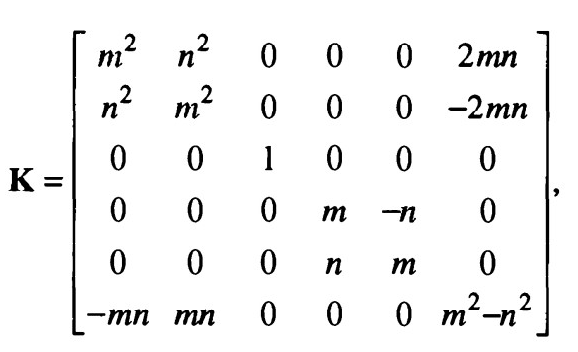

#### Where $m=cos(\theta)$ and $n=sin(\theta)$ .

In [87]:
theta=np.pi/4
m=np.cos(theta)
n=np.sin(theta)

In [88]:
k=np.array([[m**2,n**2,0,0,0,2*m*n],[n**2,m**2,0,0,0,-2*m*n],[0,0,1,0,0,0],[0,0,0,m,-n,0],[0,0,0,n,m,0],[-m*n,m*n,0,0,0,m**2-n**2]])

In [89]:
dfk=pd.DataFrame(k)
dfk

,0,1,2,3,4,5
0,0.5,0.5,0.0,0.000000,0.000000,1.000000e+00
1,0.5,0.5,0.0,0.000000,0.000000,-1.000000e+00
2,0.0,0.0,1.0,0.000000,0.000000,0.000000e+00
3,0.0,0.0,0.0,0.707107,-0.707107,0.000000e+00
4,0.0,0.0,0.0,0.707107,0.707107,0.000000e+00
5,-0.5,0.5,0.0,0.000000,0.000000,2.220446e-16


### Computation of $K^{-1}$

In [90]:
kinv=npl.inv(k)


#### $s^*=(K^{-1})^TsK^{-1}$, where $s^*$ is the transformed compliance matrix.

In [91]:
st0=np.matmul(np.transpose(kinv),s)
st=np.matmul(st0,kinv)

In [92]:
dfst=pd.DataFrame(st)
dfst

,0,1,2,3,4,5
0,1.196979e-04,-9.769337e-05,-0.000009,0.000000e+00,0.000000e+00,4.488243e-20
1,-9.769337e-05,1.196979e-04,-0.000009,0.000000e+00,0.000000e+00,-4.488243e-20
2,-9.387755e-06,-9.387755e-06,0.000204,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,0.000000,5.555556e-04,5.421011e-20,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000,5.421011e-20,5.555556e-04,0.000000e+00
5,4.149430e-20,-4.149430e-20,0.000000,0.000000e+00,0.000000e+00,4.710706e-05


### Transformed material properties:

In [93]:
print(f'E11 = {1/st[0,0]}, E33 = {1/st[1,1]}, E22 = {1/st[2,2]}')
print(f' G23 = {1/(st[3,3])},  G12={1/(st[4,4])}, G13={1/(st[5,5])} ')
print(f'v13 = {-st[0,1]/st[0,0]},  v12 = {-st[0,2]/st[0,0]},  v32 = {-st[1,2]/st[1,1]},  v23 = {v32*E22/E33}')

E11 = 8354.363349026551, E33 = 8354.363349026551, E22 = 4900.0
 G23 = 1799.9999999999995,  G12=1800.0, G13=21228.239845261123 
v13 = 0.8161659454405547,  v12 = 0.0784287171541268,  v32 = 0.0784287171541268,  v23 = 0.046


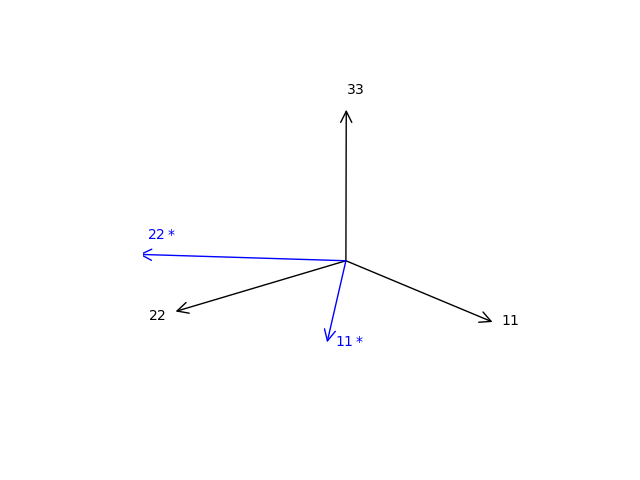

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='->', shrinkA=0, shrinkB=0)

a = Arrow3D([0, 1], [0, 0], [0, 0], **arrow_prop_dict, color='k')
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 1], [0, 0], **arrow_prop_dict, color='k')
ax.add_artist(a)
a = Arrow3D([0, 0], [0, 0], [0, 1], **arrow_prop_dict, color='k')
ax.add_artist(a)
a = Arrow3D([0, n], [0, m], [0, 0], **arrow_prop_dict, color='b')
ax.add_artist(a)
a = Arrow3D([0, m], [0, -n], [0, 0], **arrow_prop_dict, color='b')
ax.add_artist(a)





ax.text(1.15, 0, 0, r'$22$')
ax.text(0, 1.05, 0, r'$11$')
ax.text(0, 0, 1.1, r'$33$')

ax.text(m-0.15, -(n+0.15), 0, r'$22*$',color='b')
ax.text(n, m+0.05, 0, r'$11*$',color='b')


ax.view_init(azim=50, elev=20)
ax.set_axis_off()
plt.show()

In [82]:
print(f'MT130SC_{(theta*(180/np.pi))}=(({E11*1000},{E33*1000},{E22*1000},{v13},{v12},{v32},{G13*1000},{G12*1000},{G32*1000}), )')

MT130SC_45.0=((43900.0,43900.0,4900.0,0.034,0.4121224489795918,0.4121224489795918,2300.0,1800.0,1800.0), )
